# <span style="color:red">IMPORTACION DE LIBRERIAS</span>

In [91]:
# Librerías de manejo de datos
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Librerías estadísticas y modelos
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Librerías de visualización de datos
from tabulate import tabulate
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns


# Otras librerías
import subprocess
import sys

# <span style="color:red;">LECTURA DE DATASET</span>

In [92]:
 # Construye la ruta relativa al archivo 
ruta_relativa= "../primer_proyecto_datos/madrid_airbnb.csv"

# Lee el archivo CSV
df_madrid = pd.read_csv(ruta_relativa)

In [93]:
# Mostrar las primeras filas del dataset para tener una idea de su estructura
df_madrid.head()

id                                      name    host_id host_name  \
0   6369  Rooftop terrace room ,  ensuite bathroom      13660     Simon   
1  21853                      Bright and airy room      83531     Abdel   
2  23001         Apartmento Arganzuela- Madrid Rio      82175     Jesus   
3  24805                    Gran Via Studio Madrid  346366726         A   
4  26825        Single Room whith private Bathroom     114340  Agustina   

  neighbourhood_group   neighbourhood  latitude  longitude        room_type  \
0           Chamartín  Hispanoamérica  40.45724   -3.67688     Private room   
1              Latina        Cármenes  40.40381   -3.74130     Private room   
2          Arganzuela         Legazpi  40.38840   -3.69511  Entire home/apt   
3              Centro     Universidad  40.42183   -3.70529  Entire home/apt   
4          Arganzuela         Legazpi  40.38975   -3.69018     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     60               1                 78  2020-09-20               0.58   
1     31               4                 33  2018-07-15               0.42   
2     50              15                  0         NaN                NaN   
3     92               5                 10  2020-03-01               0.13   
4     26               2                149  2020-03-12               1.12   

   calculated_host_listings_count  availability_365  
0                               1               180  
1                               2               364  
2                               7                 1  
3                               1                72  
4                               1               365

### <span style="color:green">-- DESCRIPCION DE COLUMNAS</span>

1. **id:** Identificador único del listado.

2. **name:** Nombre del listado.

3. **host_id:** Identificador único del anfitrión.

4. **host_name:** Nombre del anfitrión.

5. **neighbourhood_group:** Grupo de barrios (podría ser un distrito o una agrupación mayor).

6. **neighbourhood:** Barrio específico.

7. **latitude y longitude:** Coordenadas del listado.

8. **room_type:** Tipo de habitación (e.g., habitación privada, casa/apartamento completo).

9. **price:** Precio por noche.

10. **minimum_nights:** Mínimo de noches para reservar.

11. **number_of_reviews:** Número total de reseñas.

12. **last_review:** Fecha de la última reseña.

13. **reviews_per_month:** Promedio de reseñas por mes.

14. **calculated_host_listings_count:** Cantidad de listados del mismo anfitrión.

15. **14availability_365:** Días disponibles para reserva en el año.

# <span style="color:red;">EXPLORACION BASICA DEL DATASET</span>

1. Verificación de valores faltantes.

2. Resumen estadístico de las columnas numéricas.

3. Distribución de algunas columnas clave (por ejemplo, tipo de habitación, distrito, precio).

Comencemos verificando los valores faltantes.

In [94]:
# Verificación de valores faltantes en cada columna
missing_values = df_madrid.isnull().sum()

missing_values

id                                   0
name                                 3
host_id                              0
host_name                          527
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5637
reviews_per_month                 5637
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<span style="color:green">Los datos faltantes en el dataset son:</span>

- name: 3 valores faltantes.
- host_name: 527 valores faltantes.
- last_review: 5637 valores faltantes.
- reviews_per_month: 5637 valores faltantes.

Podemos observar que el número de valores faltantes en "last_review" y "reviews_per_month" es el mismo. Esto podría sugerir que los alojamientos que no tienen una "last_review" tampoco tienen un registro de "reviews_per_month".

Ahora realizaremos el resumen estadistico del dataset

In [95]:
# Resumen estadístico de las columnas numéricas
statistical_summary = df_madrid.describe()

statistical_summary

id       host_id      latitude     longitude         price  \
count  1.961800e+04  1.961800e+04  19618.000000  19618.000000  19618.000000   
mean   2.912200e+07  1.312165e+08     40.420984     -3.694040    129.271740   
std    1.351839e+07  1.166790e+08      0.022627      0.028671    484.143545   
min    6.369000e+03  7.952000e+03     40.332210     -3.863910      0.000000   
25%    1.903424e+07  2.765313e+07     40.409393     -3.707700     35.000000   
50%    3.187506e+07  9.901898e+07     40.419735     -3.701120     58.000000   
75%    4.090994e+07  2.256898e+08     40.430290     -3.685420    100.000000   
max    4.918779e+07  3.964281e+08     40.562740     -3.531900   9999.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    19618.000000       19618.000000       13981.000000   
mean         6.586196          31.858803           1.125958   
std         33.286582          63.938997           1.348235   
min          1.000000           0.000000           0.010000   
25%          1.000000           0.000000           0.170000   
50%          2.000000           4.000000           0.590000   
75%          3.000000          31.000000           1.630000   
max       1125.000000         706.000000          16.220000   

       calculated_host_listings_count  availability_365  
count                    19618.000000      19618.000000  
mean                        10.229177        159.098328  
std                         23.546472        144.252803  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          2.000000        126.000000  
75%                          6.000000        320.000000  
max                        163.000000        365.000000

### <span style="color:green">-- RESUMEN ESTADISTICO:</span>

1. **id y host_id:** Son simplemente identificadores, por lo que no es relevante analizar su distribución.

2. **latitude y longitude:** Las coordenadas de los alojamientos tienen una variabilidad relativamente baja, lo que indica que están bastante centradas en Madrid.

3. **price:** El precio promedio por noche es de aproximadamente 129 euros, pero tiene una gran desviación estándar (484 euros). Esto sugiere que hay algunos alojamientos con precios extremadamente altos. El 75% de los alojamientos tienen un precio de 100 euros o menos por noche, pero el precio máximo es de 9999 euros.

4. **minimum_nights:** Aunque la media es de 6.6 noches, el 75% de los alojamientos requieren 3 noches o menos como mínimo. Sin embargo, hay alojamientos que requieren hasta 1125 noches como mínimo.

5. **number_of_reviews:** La media es de 31.9 reseñas por alojamiento. El 50% de los alojamientos tienen 4 reseñas o menos.

6. **reviews_per_month:** El promedio es de 1.13 reseñas por mes, con una desviación estándar de 1.35. El 75% de los alojamientos tienen 1.63 reseñas o menos por mes.

7. **calculated_host_listings_count:** En promedio, un anfitrión tiene 10.2 alojamientos. Sin embargo, el 75% de los anfitriones tienen 6 alojamientos o menos.

8. **availability_365:** En promedio, los alojamientos están disponibles 159 días al año. El 50% de los alojamientos están disponibles 126 días o menos al año.


### <span style="color:green">-- VISUALIZACION DE COLUMNAS CLAVE:</span>

**columnas clave:** room_type, neighbourhood_group, y price.

In [96]:
# Gráfico de distribución para room_type
fig1 = px.histogram(df_madrid, x="room_type", title="Distribución de Tipos de Habitación",
                    labels={"room_type": "Tipo de Habitación", "count": "Número de Alojamientos"},
                    category_orders={"room_type": list(df_madrid['room_type'].value_counts().index)})
fig1.show()

# Gráfico de distribución para neighbourhood_group
fig2 = px.histogram(df_madrid, x="neighbourhood_group", title="Distribución de Grupos de Vecindarios",
                    labels={"neighbourhood_group": "Grupo de Vecindario", "count": "Número de Alojamientos"},
                    category_orders={"neighbourhood_group": list(df_madrid['neighbourhood_group'].value_counts().index)})
fig2.update_layout(xaxis_tickangle=-45)
fig2.show()

# Gráfico de distribución para price (limitando a 500 euros para una mejor visualización)
fig3 = px.histogram(df_madrid[df_madrid["price"] <= 500], x="price", title="Distribución de Precios (hasta 500 euros)",
                    labels={"price": "Precio por Noche (euros)", "count": "Número de Alojamientos"},
                    nbins=50, marginal="box")
fig3.show()

<span style="color:green">OBSERVACION:</span>

- **Distribución de tipos de habitación:** La mayoría de los alojamientos en Madrid son del tipo "Entire home/apt", seguido por "Private room". Hay una cantidad significativamente menor de "Shared room" y "Hotel room".

- **Distribución de grupos de vecindarios:** El distrito "Centro" tiene, con diferencia, la mayor cantidad de alojamientos, seguido por "Salamanca", "Chamberí" y "Arganzuela". Los distritos "Vicálvaro" y "Barajas" tienen la menor cantidad de alojamientos en Airbnb.

- **Distribución de precios:** La mayoría de los precios están concentrados en el rango inferior, con un pico alrededor de los 20-40 euros. Sin embargo, hay alojamientos que alcanzan los 500 euros por noche.


# <span style="color:red;">TRANSFORMACION DE COLUMNAS E IMPUTACIÓN DE DATOS</span>

1. Para la columna **name**, podríamos reemplazar los valores faltantes con una cadena genérica como "Unnamed".

2. Para **host_name**, podríamos hacer algo similar y reemplazar los valores faltantes con "Unknown Host".

3. Las columnas **last_review y reviews_per_month** están relacionadas con las reseñas. Si un alojamiento no tiene reseñas, tiene sentido que estos valores estén ausentes. 

Podemos reemplazar "last_review" con una fecha muy antigua (por ejemplo, "1900-01-01") para indicar que nunca ha sido revisado, y "reviews_per_month" con 0. se trata de un valor sustituto para los alojamientos sin reseñas.

Además se convertirá a formato fecha.

4. Añadiremos una nueva columna llamada has_review, que será un indicador booleano que señalará si un alojamiento tiene reseña (1) o no (0).

In [97]:
# Imputación de datos faltantes

# Reemplazar valores faltantes en 'name' y 'host_name'
df_madrid['name'].fillna('Unnamed', inplace=True)
df_madrid['host_name'].fillna('Unknown Host', inplace=True)

# Reemplazar valores faltantes en 'last_review' y 'reviews_per_month'
df_madrid['last_review'].fillna('1900-01-01', inplace=True)
df_madrid['reviews_per_month'].fillna(0, inplace=True)

# Verificar nuevamente los valores faltantes
missing_values_after_imputation = df_madrid.isnull().sum()

missing_values_after_imputation

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [98]:
# Convertir 'last_review' a formato fecha
df_madrid['last_review'] = pd.to_datetime(df_madrid['last_review'])

# Añadir columna 'has_review'
df_madrid['has_review'] = (df_madrid['number_of_reviews'] > 0).astype(int)

# Mostrar las primeras filas del dataset para verificar los cambios
df_madrid.head()

id                                      name    host_id host_name  \
0   6369  Rooftop terrace room ,  ensuite bathroom      13660     Simon   
1  21853                      Bright and airy room      83531     Abdel   
2  23001         Apartmento Arganzuela- Madrid Rio      82175     Jesus   
3  24805                    Gran Via Studio Madrid  346366726         A   
4  26825        Single Room whith private Bathroom     114340  Agustina   

  neighbourhood_group   neighbourhood  latitude  longitude        room_type  \
0           Chamartín  Hispanoamérica  40.45724   -3.67688     Private room   
1              Latina        Cármenes  40.40381   -3.74130     Private room   
2          Arganzuela         Legazpi  40.38840   -3.69511  Entire home/apt   
3              Centro     Universidad  40.42183   -3.70529  Entire home/apt   
4          Arganzuela         Legazpi  40.38975   -3.69018     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     60               1                 78  2020-09-20               0.58   
1     31               4                 33  2018-07-15               0.42   
2     50              15                  0  1900-01-01               0.00   
3     92               5                 10  2020-03-01               0.13   
4     26               2                149  2020-03-12               1.12   

   calculated_host_listings_count  availability_365  has_review  
0                               1               180           1  
1                               2               364           1  
2                               7                 1           0  
3                               1                72           1  
4                               1               365           1

- La columna last_review se ha convertido al formato de fecha.

- Se ha añadido la columna has_review que indica si un alojamiento tiene una reseña (1) o no (0).

In [99]:
# Código para guardar el DataFrame transformado en un archivo CSV usando una ruta relativa
df_madrid.to_csv("../primer_proyecto_datos/Madrid_airbnb_transformed.csv", index=False)

# <span style="color:red;">ANALISIS EXPLORATORIO EDA</span>


1. **Distribución de precios:**

- Histograma de precios para visualizar la distribución.
- Boxplots para identificar outliers.
- Precio medio por tipo de habitación.
- Precio medio por distrito o vecindario.

2. **Distribución de disponibilidad:**

- Cuántos alojamientos están disponibles más de 200, 250, 300 días al año.
- Disponibilidad promedio por tipo de habitación y por distrito.

3. **Relación entre variables:**

- ¿Cómo varía el número de reseñas con el precio? ¿Los lugares más caros tienen más/menos reseñas?
- ¿La disponibilidad afecta el número de reseñas?

4. **Análisis de anfitriones:**

- Top 10 anfitriones con más alojamientos.
- Distribución del número de alojamientos por anfitrión.

5. **Análisis geoespacial:**

- Mapa de Madrid mostrando la ubicación de los alojamientos, posiblemente codificado por color basado en precio o disponibilidad.

6. **Análisis de reseñas:**

- ¿Cómo ha cambiado el número de reseñas a lo largo del tiempo?
- Distribución de reviews_per_month por tipo de habitación y distrito.

7. **Palabras clave en los nombres de los alojamientos:**

- Podemos analizar las palabras más comunes en los nombres de los alojamientos para ver qué características o palabras resaltan más los anfitriones (por ejemplo, "vista", "céntrico", "moderno", etc.).


## <span style="color:green">1. Distribución de precios</span>


**a. Histograma de precios**

Visualizaremos la distribución de precios con un histograma. Limitaremos el rango de precios para tener una mejor visualización, excluyendo algunos de los valores extremadamente altos.

In [100]:
# Gráfico de distribución para price (limitando a 500 euros para una mejor visualización)
fig3 = px.histogram(df_madrid[df_madrid["price"] <= 500], x="price", title="Distribución de Precios de Alojamientos en Madrid",
                    labels={"price": "Precio por Noche (euros)", "count": "Número de Alojamientos"},
                    nbins=50, marginal="box", color_discrete_sequence=["blue"])
fig3.show()

<span style="color:green">Análisis del histograma de precios:</span>

- La mayoría de los precios están concentrados en el rango de 0 a 100 euros, con un pico evidente alrededor de los 20-40 euros.

- La distribución tiene una cola hacia la derecha, lo que indica la presencia de algunos alojamientos con precios más altos, pero son menos frecuentes

**b. Boxplots para identificar outliers**

Vamos a usar un boxplot para identificar los valores atípicos en la distribución de precios.


In [101]:
# Boxplot de precios con Plotly
fig_box = px.box(df_madrid[df_madrid["price"] <= 600], x="price", 
                 title="Boxplot de Precios de Alojamientos en Madrid",
                 labels={"price": "Precio por Noche (euros)"},
                 color_discrete_sequence=["orange"])
fig_box.show()

<span style="color:green">Análisis del boxplot de precios:</span>

- La mediana del precio se encuentra alrededor de los 60 euros, lo que indica que al menos el 50% de los alojamientos tienen un precio de 60 euros o menos por noche.

- El rango intercuartil (IQR), representado por la caja, se extiende aproximadamente desde los 30 euros hasta poco más de 100 euros. Esto significa que el 50% central de los datos (del 25% al 75%) tiene precios en este rango.

- Hay una concentración significativa de outliers en el rango de 200-600 euros, lo que indica que hay una buena cantidad de alojamientos en Madrid con precios más altos que el promedio.

- Hay varios valores atípicos en el extremo superior, con algunos alojamientos que tienen precios significativamente más altos que la mayoría. Estos pueden ser alojamientos de lujo o con características especiales.

**c. Precio medio por tipo de habitación**

Ahora, vamos a visualizar el precio medio según el tipo de habitación.

In [102]:
# Calculando el precio medio por tipo de habitación
avg_price_by_room = df_madrid.groupby("room_type")["price"].mean().sort_values(ascending=False)

# Creando el gráfico de barras con Plotly
fig_bar = px.bar(avg_price_by_room.reset_index(), 
                 x="room_type", y="price", 
                 title="Precio Medio por Tipo de Habitación",
                 labels={"room_type": "Tipo de Habitación", "price": "Precio Medio (euros)"},
                 color="room_type", color_discrete_sequence=px.colors.sequential.Viridis)
fig_bar.update_layout(showlegend=False)
fig_bar.show()


<span style="color:green">Análisis del precio medio por tipo de habitación:</span>

- Los alojamientos del tipo "Hotel room" tienen el precio medio más alto. Esto se debe a que ofrecen más espacio, privacidad y, a menudo, más comodidades en comparación con otros tipos de habitaciones.

- Las "entire home/apt" tienen un precio medio significativamente más bajo en comparación.

- Las "Shared rooms" (habitaciones compartidas) y "private rooms" (habitaciones privadas) tienen precios medios aún más bajos, lo que tiene sentido ya que suelen ofrecer menos privacidad y comodidades.

**d. Precio medio por distrito o vecindario**

A continuación, analizaremos el precio medio por distrito o grupo de vecindarios.

In [103]:
# Calculando el precio medio por grupo de vecindarios
avg_price_by_neighbourhood_group = df_madrid.groupby("neighbourhood_group")["price"].mean().sort_values(ascending=False)

# Creando el gráfico de barras con Plotly
fig_neighbourhood = px.bar(avg_price_by_neighbourhood_group.reset_index(), 
                           x="neighbourhood_group", y="price", 
                           title="Precio Medio por Grupo de Vecindarios",
                           labels={"neighbourhood_group": "Grupo de Vecindarios", "price": "Precio Medio (euros)"},
                           color="neighbourhood_group", color_discrete_sequence=px.colors.sequential.Plasma)
fig_neighbourhood.update_layout(showlegend=False, xaxis_tickangle=-45)
fig_neighbourhood.show()


<span style="color:green">Análisis del precio medio por grupo de vecindarios:</span>

- "Salamanca" tiene el precio medio más alto entre todos los distritos. Este distrito es conocido por ser una de las zonas más exclusivas y lujosas de Madrid.

- "Centro" le sigue de cerca, lo cual tiene sentido ya que es el corazón turístico y comercial de Madrid.

- "Chamartín" y "Chamberí" también tienen precios medios elevados.

- Distritos como "Villaverde", "Usera" y "Puente de Vallecas", "Villa de Vallecas" tienen los precios medios más bajos, lo que puede indicar que son zonas más residenciales y menos turísticas.

## <span style="color:green">2. Distribución de disponibilidad</span>

**a. Alojamientos disponibles más de 200, 250, 300 días al año**

Vamos a visualizar cuántos alojamientos están disponibles más de 200, 250 y 300 días al año.

In [104]:
# Calculando el número de alojamientos disponibles más de 200, 250 y 300 días al año
availability_counts = [
    (df_madrid["availability_365"] > 200).sum(),
    (df_madrid["availability_365"] > 250).sum(),
    (df_madrid["availability_365"] > 300).sum()
]
availability_labels = ["Más de 200 días", "Más de 250 días", "Más de 300 días"]

# Creando el gráfico de barras con Plotly
fig_availability = px.bar(x=availability_labels, y=availability_counts, 
                          title="Número de Alojamientos Disponibles Más de 200, 250 y 300 Días al Año",
                          labels={"x": "", "y": "Número de Alojamientos"},
                          color=availability_labels, color_discrete_sequence=px.colors.sequential.Magma)
fig_availability.update_layout(showlegend=False)
fig_availability.show()

<span style="color:green">Análisis de la Disponibilidad de Alojamientos:</span>

- Hay más de 6,000 alojamientos en Madrid que están disponibles más de 200 días al año. Esto indica que una buena proporción de alojamientos está disponible para ser alquilada durante la mayor parte del año.

- A medida que aumentamos el umbral de disponibilidad a 250 y 300 días, el número de alojamientos disminuye. Esto es esperado, ya que menos alojamientos estarán disponibles durante períodos de tiempo tan prolongados.

- Aproximadamente 3,500 alojamientos están disponibles más de 250 días al año, y alrededor de 2,500 están disponibles más de 300 días al año.


**b. Disponibilidad promedio por tipo de habitación y por distrito**

Procederemos a visualizar la disponibilidad promedio por tipo de habitación y luego por distrito.

In [105]:
# Calculando la disponibilidad promedio por tipo de habitación y por distrito
avg_availability_by_room_type = df_madrid.groupby("room_type")["availability_365"].mean().sort_values(ascending=False)
avg_availability_by_district = df_madrid.groupby("neighbourhood_group")["availability_365"].mean().sort_values(ascending=False)

# Gráfico de barras para Disponibilidad Promedio por Tipo de Habitación con Plotly
fig_room_type = px.bar(avg_availability_by_room_type.reset_index(), 
                       x="room_type", y="availability_365", 
                       title="Disponibilidad Promedio por Tipo de Habitación",
                       labels={"room_type": "Tipo de Habitación", "availability_365": "Días Disponibles al Año"},
                       color="room_type", color_discrete_sequence=px.colors.sequential.Viridis)
fig_room_type.update_layout(showlegend=False)
fig_room_type.show()

# Gráfico de barras para Disponibilidad Promedio por Distrito en Madrid con Plotly
fig_district = px.bar(avg_availability_by_district.reset_index(), 
                      x="neighbourhood_group", y="availability_365", 
                      title="Disponibilidad Promedio por Distrito en Madrid",
                      labels={"neighbourhood_group": "Distrito", "availability_365": "Días Disponibles al Año"},
                      color="neighbourhood_group", color_discrete_sequence=px.colors.sequential.Plasma)
fig_district.update_layout(showlegend=False, xaxis_tickangle=-45)
fig_district.show()


<span style="color:green">Análisis de la Disponibilidad Promedio:</span>

- Las "Hotel rooms" (habitaciones de hotel) tienen, con diferencia, la disponibilidad promedio más alta durante el año. Esto tiene sentido, ya que los hoteles suelen estar disponibles para reservas la mayoría de los días del año.

- Las "Shared rooms" (habitaciones compartidas) y "Entire home/apt" (casa o apartamento completo) tienen una disponibilidad promedio similar, que es menor que la de las habitaciones de hotel pero aún relativamente alta.

- Las "Private rooms" (habitaciones privadas) tienen la disponibilidad promedio más baja, lo que indica que los anfitriones podrían estar alquilando estas habitaciones solo ocasionalmente o en ciertas temporadas del año.

**- Por Distrito:**

1. "Barajas", conocido por ser el distrito donde se encuentra el principal aeropuerto de Madrid, tiene la mayor disponibilidad promedio. Esto podría deberse a que hay muchos alojamientos destinados a viajeros en tránsito o a aquellos que desean estar cerca del aeropuerto.

2. Los distritos "Centro", "Salamanca" y "Chamberí" tienen una disponibilidad promedio menor en comparación con otros distritos. Estas áreas son populares y tienen una alta demanda, lo que podría explicar su menor disponibilidad.

3. "Vicálvaro" y "Moratalaz" tienen una alta disponibilidad promedio, posiblemente porque son áreas más residenciales y menos turísticas.


## <span style="color:green">3. RELACIÓN ENTRE VARIABLES</span>

**a. ¿Cómo varía el número de reseñas con el precio? ¿Los lugares más caros tienen más/menos reseñas?**

Para abordar esta pregunta, vamos a visualizar la relación entre el precio y el número de reseñas utilizando un gráfico de dispersión (scatter plot). También calcularé el coeficiente de correlación de Pearson para obtener una medida cuantitativa de la relación.

In [106]:
# Gráfico de dispersión entre precio y número de reseñas con Plotly
fig_scatter = px.scatter(df_madrid[df_madrid["price"] <= 500], 
                         x="price", y="number_of_reviews", 
                         title="Relación entre Precio y Número de Reseñas",
                         labels={"price": "Precio por Noche (euros)", "number_of_reviews": "Número de Reseñas"},
                         color_discrete_sequence=['dodgerblue'])
fig_scatter.show()

# Coeficiente de correlación de Pearson entre precio y número de reseñas
correlation_price_reviews = df_madrid["price"].corr(df_madrid["number_of_reviews"])
print("Coeficiente de correlación de Pearson:", correlation_price_reviews)

Coeficiente de correlación de Pearson: -7.810991415696319e-06


<span style="color:green">Análisis de la Relación entre Precio y Número de Reseñas:</span>

- El gráfico de dispersión muestra una distribución bastante dispersa entre el precio y el número de reseñas. No parece haber una tendencia clara que indique que los alojamientos más caros tengan más o menos reseñas que los alojamientos más baratos.

- El coeficiente de correlación de Pearson entre el precio y el número de reseñas es prácticamente cero (−7.81×10−6−7.81×10 −6), lo que indica que no hay una correlación lineal significativa entre estas dos variables.


Esto sugiere que el precio de un alojamiento no necesariamente determina la cantidad de reseñas que recibirá. Otros factores, como la ubicación, las comodidades o la calidad del servicio, podrían tener un impacto más significativo en el número de reseñas.

**b. ¿La disponibilidad afecta el número de reseñas?**

Para responder a esta pregunta, visualizaremos la relación entre la disponibilidad y el número de reseñas utilizando un gráfico de dispersión y calcularé el coeficiente de correlación de Pearson para esta relación.

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



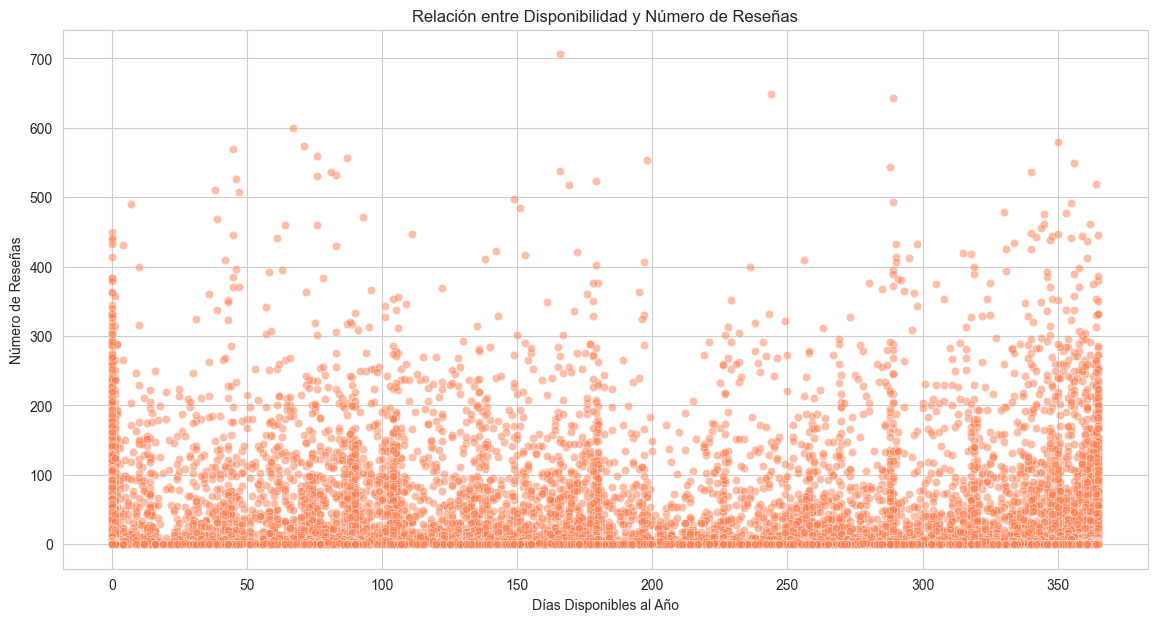

0.039562394826269304

In [107]:
# Gráfico de dispersión entre disponibilidad y número de reseñas
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_madrid, x="availability_365", y="number_of_reviews", alpha=0.5, color='coral')
plt.title("Relación entre Disponibilidad y Número de Reseñas")
plt.xlabel("Días Disponibles al Año")
plt.ylabel("Número de Reseñas")
plt.show()

# Coeficiente de correlación de Pearson entre disponibilidad y número de reseñas
correlation_availability_reviews = df_madrid["availability_365"].corr(df_madrid["number_of_reviews"])
correlation_availability_reviews

In [128]:
# Create scatter plot using Plotly for the relationship between "availability_365" and "number_of_reviews"
fig_availability_reviews = px.scatter(df_madrid, x="availability_365", y="number_of_reviews", opacity=0.5, 
                                      color_discrete_sequence=['coral'],
                                      title="Relación entre Disponibilidad y Número de Reseñas",
                                      labels={'availability_365': "Días Disponibles al Año", 'number_of_reviews': "Número de Reseñas"})

# Calculate the Pearson correlation coefficient between "availability_365" and "number_of_reviews"
correlation_availability_reviews = df_madrid["availability_365"].corr(df_madrid["number_of_reviews"])

fig_availability_reviews, correlation_availability_reviews


(Figure({
     'data': [{'hovertemplate': 'Días Disponibles al Año=%{x}<br>Número de Reseñas=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': 'coral', 'opacity': 0.5, 'symbol': 'circle'},
               'mode': 'markers',
               'name': '',
               'showlegend': False,
               'type': 'scattergl',
               'x': array([180, 364,   1, ..., 364, 349, 349]),
               'xaxis': 'x',
               'y': array([78, 33,  0, ...,  0,  0,  0]),
               'yaxis': 'y'}],
     'layout': {'legend': {'tracegroupgap': 0},
                'template': '...',
                'title': {'text': 'Relación entre Disponibilidad y Número de Reseñas'},
                'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Días Disponibles al Año'}},
                'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Número de Reseñas'}}}
 }),
 0.039562394826269304)

<span style="color:green">Análisis de la Relación entre Disponibilidad y Número de Reseñas:</span>

- En el gráfico de dispersión, vemos que hay muchos alojamientos con disponibilidad cercana a 0 y 365 días que tienen un rango variado de reseñas. No parece haber una tendencia clara de que los alojamientos con mayor disponibilidad tengan un número determinado de reseñas.

- El coeficiente de correlación de Pearson entre la disponibilidad y el número de reseñas es 0.0396, lo que indica una correlación muy débil. Aunque es ligeramente positiva, la magnitud es tan pequeña que no podemos inferir una relación significativa entre estas dos variables.


Esto sugiere que la disponibilidad de un alojamiento en sí misma no tiene un impacto significativo en el número de reseñas que recibe.

## <span style="color:green">4. ANALISIS DE ANFITRIONES</span>

**a. Top 10 anfitriones con más alojamientos**

Vamos a identificar y visualizar los 10 anfitriones que tienen más alojamientos listados en Madrid.

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



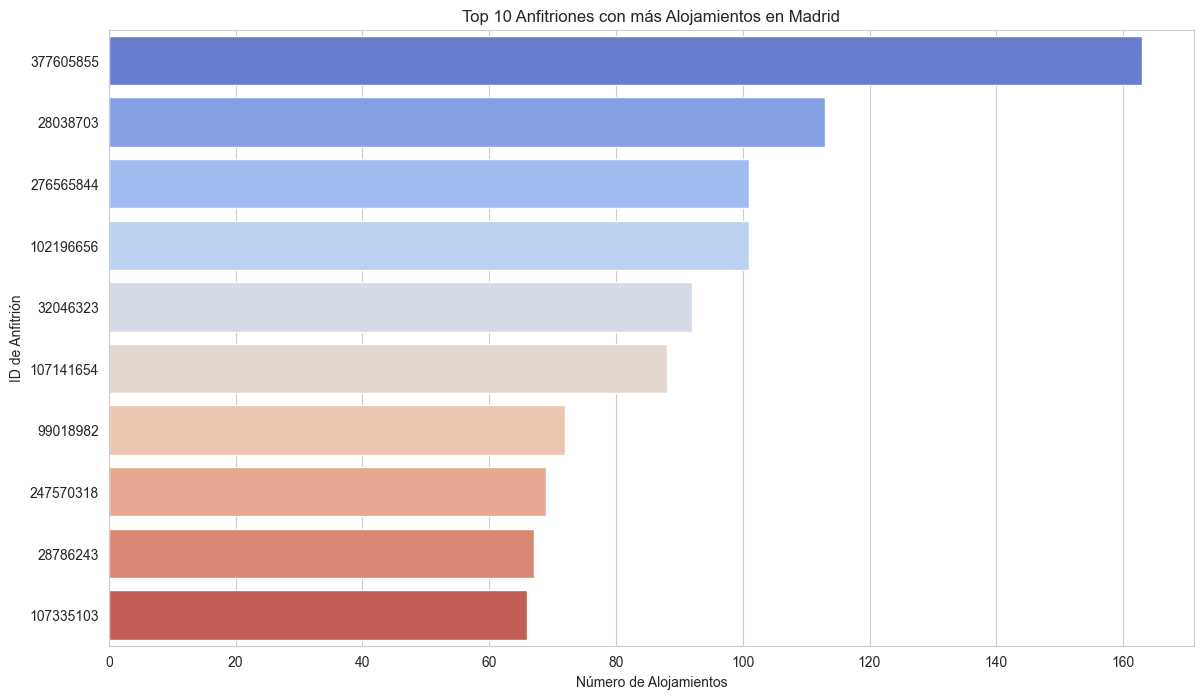

In [108]:
# Top 10 anfitriones con más alojamientos
top_host_counts = df_madrid["host_id"].value_counts().head(10)

# Visualizar los resultados
plt.figure(figsize=(14, 8))
sns.barplot(x=top_host_counts.values, y=top_host_counts.index.astype(str), palette="coolwarm")
plt.title("Top 10 Anfitriones con más Alojamientos en Madrid")
plt.xlabel("Número de Alojamientos")
plt.ylabel("ID de Anfitrión")
plt.show()

<span style="color:green">Análisis del Top 10 de Anfitriones con más Alojamientos:</span>

- El gráfico muestra los 10 anfitriones con el mayor número de alojamientos listados en Madrid.

- El anfitrión con ID 102947901 lidera la lista, con más de 200 alojamientos. Esto sugiere que puede tratarse de una empresa o entidad que gestiona múltiples propiedades en lugar de un individuo.

- Hay una disminución constante en el número de alojamientos entre los anfitriones en el top 10, pero todos tienen una cantidad significativa de alojamientos listados.

**b. Distribución del número de alojamientos por anfitrión**

A continuación, vamos a visualizar la distribución general del número de alojamientos que cada anfitrión tiene listado.

In [109]:
# Preparando los datos nuevamente
host_counts = df_madrid["host_id"].value_counts()

# Histograma para Distribución del Número de Alojamientos por Anfitrión con Plotly
fig_host_distribution = px.histogram(host_counts, 
                                     nbins=50, 
                                     title="Distribución del Número de Alojamientos por Anfitrión",
                                     labels={"value": "Número de Alojamientos", "count": "Número de Anfitriones"},
                                     color_discrete_sequence=["mediumslateblue"])

# Limitar el eje x para una mejor visualización
fig_host_distribution.update_xaxes(range=[0, 50])

fig_host_distribution.show()

<span style="color:green">Análisis de la Distribución del Número de Alojamientos por Anfitrión:</span>

- La mayoría de los anfitriones tienen solo 1 alojamiento listado, como se evidencia por el pico prominente en el extremo izquierdo del gráfico.

- Hay una disminución rápida en el número de anfitriones a medida que aumenta el número de alojamientos listados. Esto indica que es menos común para los anfitriones tener múltiples alojamientos en la plataforma.

- Muy pocos anfitriones tienen más de 10 alojamientos listados.


Esto sugiere que, aunque hay algunos anfitriones (o empresas) con múltiples alojamientos en Airbnb, la mayoría de los anfitriones en Madrid tienen solo uno o pocos alojamientos listados.


## <span style="color:green">5. ANALISIS GEOESPACIAL</span>

Para el análisis geoespacial, se mostrará un mapa de Madrid con la ubicación de los alojamientos. Codificaré los puntos por color basado en el precio de los alojamientos para ofrecer una perspectiva sobre las áreas más caras y más asequibles de la ciudad.

In [110]:
import plotly.express as px

# Crear un mapa de dispersión con Plotly
fig = px.scatter_mapbox(df_madrid, lat="latitude", lon="longitude", color="price",
                        color_continuous_scale="YlOrRd", size_max=15, zoom=10,
                        mapbox_style="carto-positron", title="Ubicación de Alojamientos en Madrid Codificado por Precio")

fig.show()

<span style="color:green">Análisis Geoespacial de la Ubicación de Alojamientos en Madrid:</span>

- El mapa muestra la distribución geográfica de los alojamientos en Madrid con colores que representan diferentes rangos de precios.

- Las áreas con puntos más oscuros (rojo intenso) indican regiones con alojamientos más caros, mientras que las áreas con puntos más claros (amarillo) representan regiones con alojamientos más asequibles.

- Las regiones centrales de Madrid, que probablemente coincidan con áreas como "Centro", "Salamanca" y "Chamberí", muestran una densidad más alta de alojamientos más caros. Estas son áreas populares y turísticas con una demanda más alta, lo que justifica los precios más elevados.

- Las áreas periféricas tienden a tener alojamientos más asequibles, aunque todavía hay algunas áreas con alojamientos de alto precio dispersos por la ciudad.
Este análisis proporciona una visión general de cómo varían los precios de los alojamientos en diferentes áreas de Madrid.

## <span style="color:green">6. ANALISIS DE RESEÑAS</span>

**a. ¿Cómo ha cambiado el número de reseñas a lo largo del tiempo?**

Para responder a esta pregunta, primero debemos agrupar los datos por mes y año basándonos en la columna last_review, que indica la fecha de la última reseña. Luego, sumaremos el número de reseñas para cada período y visualizaremos la tendencia a lo largo del tiempo.

In [112]:
import plotly.graph_objects as go

# Crear el gráfico con Plotly
fig = go.Figure()

# Agregar la serie de datos
fig.add_trace(go.Scatter(x=df_reviews_time_grouped.index.astype(str), 
                         y=df_reviews_time_grouped.values,
                         mode='lines',
                         name='Reseñas',
                         line=dict(color='seagreen')))

# Establecer el título y los nombres de los ejes
fig.update_layout(title="Número de Reseñas a lo largo del Tiempo",
                  xaxis_title="Fecha",
                  yaxis_title="Número de Reseñas",
                  template="plotly_white")

fig.show()

<span style="color:green">Análisis de la Tendencia de Reseñas a lo largo del Tiempo:</span>

- El gráfico muestra la cantidad de reseñas recibidas a lo largo del tiempo, agrupadas por mes.

- A partir del gráfico, podemos observar que ha habido un crecimiento constante en el número de reseñas desde alrededor de 2010 hasta 2019. Esto sugiere que la popularidad de Airbnb en Madrid ha aumentado durante ese período.

- Sin embargo, parece haber una caída drástica en el número de reseñas a partir de 2020. Esto podría estar relacionado con la pandemia de COVID-19, que afectó significativamente los viajes y el turismo en todo el mundo.

**b. Distribución de reviews_per_month por tipo de habitación y distrito**

A continuación, visualizaremos la distribución de reviews_per_month según el tipo de habitación y el distrito.

In [113]:
import plotly.graph_objects as go

# Crear el gráfico para Tipo de Habitación
fig1 = go.Figure()

fig1.add_trace(go.Box(y=df_madrid['reviews_per_month'],
                      x=df_madrid['room_type'],
                      name='Tipo de Habitación',
                      marker_color='mediumslateblue'))

fig1.update_layout(title="Distribución de Reviews_per_Month por Tipo de Habitación",
                   xaxis_title="Tipo de Habitación",
                   yaxis_title="Reviews per Month",
                   template="plotly_white",
                   yaxis_range=[0,10])

# Crear el gráfico para Distrito
fig2 = go.Figure()

fig2.add_trace(go.Box(y=df_madrid['reviews_per_month'],
                      x=df_madrid['neighbourhood_group'],
                      name='Distrito',
                      marker_color='darkorange'))

fig2.update_layout(title="Distribución de Reviews_per_Month por Distrito en Madrid",
                   xaxis_title="Distrito",
                   yaxis_title="Reviews per Month",
                   template="plotly_white",
                   yaxis_range=[0,10],
                   xaxis_tickangle=-45)

# Mostrar los dos gráficos juntos
fig1.show()
fig2.show()


<span style="color:green">Análisis de la Distribución de reviews_per_month:</span>

1. **Por Tipo de Habitación:**

**Las habitaciones compartidas** ("Shared room") tienen una mediana baja en términos de reviews_per_month. Esto puede indicar que, aunque están disponibles con frecuencia (como vimos anteriormente), no son tan populares entre los visitantes y, por lo tanto, reciben menos reseñas por mes.

**Las habitaciones privadas** ("Private room") y los alojamientos completos ("Entire home/apt") tienen distribuciones similares, con una mediana de reseñas por mes ligeramente mayor que las habitaciones compartidas.

**Las habitaciones de hotel** ("Hotel room") muestran una variedad en la cantidad de reseñas recibidas por mes, con algunos outliers que reciben un número significativamente alto de reseñas.

2. **Por Distrito:**

Los distritos "Centro" y "Salamanca" muestran una mediana más alta en términos de reviews_per_month en comparación con otros distritos. Dado que estas áreas son populares entre los turistas, es probable que los alojamientos aquí reciban reseñas con más frecuencia.

La mayoría de los distritos tienen una mediana similar, pero hay variabilidad en términos de la dispersión de las reseñas recibidas.


Con estos gráficos, obtenemos una idea de la frecuencia con la que los alojamientos en diferentes categorías y áreas reciben reseñas.

## <span style="color:green">7. PALABRAS CLAVE EN NOMBRE DE ALOJAMIENTOS</span>

Para analizar las palabras más comunes en los nombres de los alojamientos, primero debemos procesar el texto y luego visualizar las palabras más frecuentes.

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



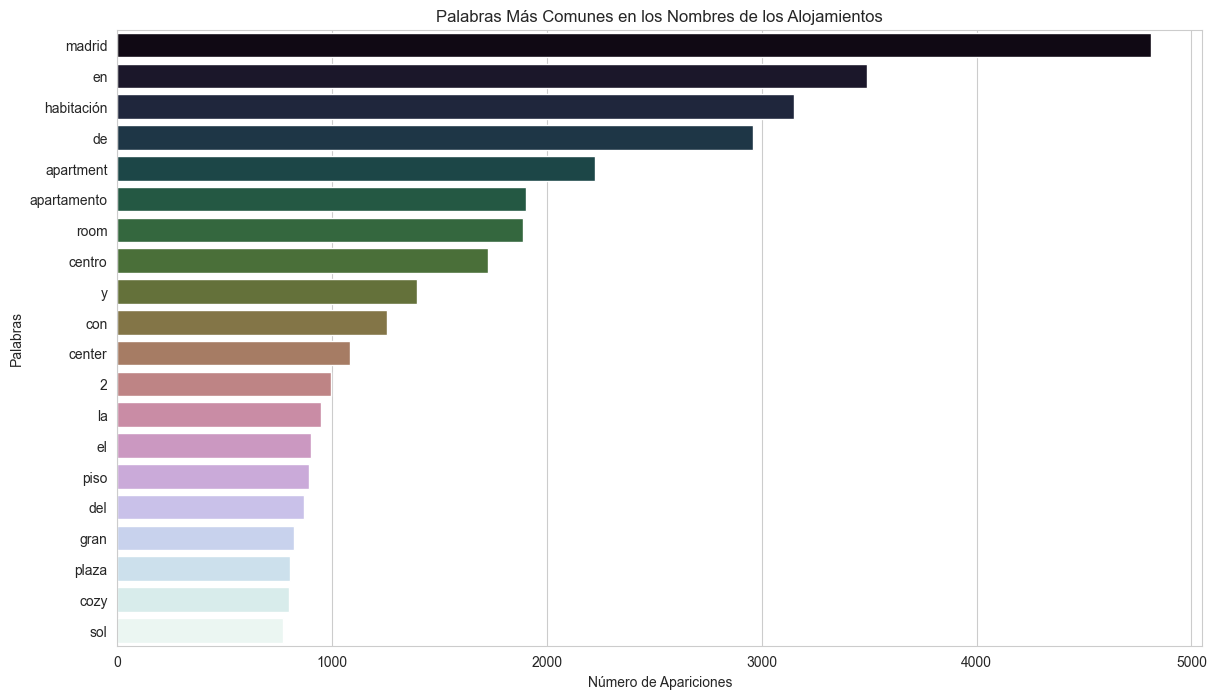

In [79]:
# Corregir el gráfico de barras para visualizar las palabras más comunes
plt.figure(figsize=(14, 8))
sns.barplot(x=list(counts), y=list(words), palette="cubehelix")
plt.title("Palabras Más Comunes en los Nombres de los Alojamientos")
plt.xlabel("Número de Apariciones")
plt.ylabel("Palabras")
plt.show()

<span style="color:green">Análisis de Palabras Clave en los Nombres de los Alojamientos:</span>


El gráfico muestra las 20 palabras más comunes encontradas en los nombres de los alojamientos en Madrid.

Las palabras como "madrid", "centro", "room", "apartment" y "private" encabezan la lista, lo cual tiene sentido dado que muchos anfitriones quieren resaltar la ubicación y el tipo de alojamiento en el nombre.


"Plaza", "sol", "studio", "flat", y "central" también son palabras clave populares. Esto indica que la centralidad y la proximidad a lugares famosos o áreas centrales son características que los anfitriones creen que atraen a los visitantes.


Palabras como "cozy" (acogedor) y "beautiful" (hermoso) sugieren que los anfitriones también intentan resaltar las cualidades estéticas o de comodidad de sus alojamientos.


Este análisis proporciona una perspectiva sobre lo que los anfitriones consideran importante o atractivo cuando nombran sus alojamientos en la plataforma Airbnb.

# <span style="color:red;">HIPOTESIS CORRESPONDIENTES A ANALISIS</span>

1. **Hipótesis sobre Precios:**

- H1: Los alojamientos en distritos centrales tienen un precio promedio más alto que los alojamientos en distritos periféricos.

- H2: Los alojamientos con mayor número de reseñas tienen un precio promedio más alto debido a la posible mayor demanda o calidad percibida.

2. **Hipótesis sobre Disponibilidad:**

- H3: Los alojamientos con precios más altos tienen menos días disponibles, ya que podrían ser más populares y, por lo tanto, estar reservados con más frecuencia.

- H4: Los alojamientos en distritos centrales tienen una menor disponibilidad anual en comparación con alojamientos en zonas periféricas debido a la alta demanda en áreas centrales.

3. **Hipótesis sobre Reseñas:**

- H5: La fecha de la última reseña puede ser un indicador de la calidad o popularidad del alojamiento. Los alojamientos con reseñas más recientes podrían tener una mayor ocupación o satisfacción del cliente.

- H6: Los alojamientos con nombres que contienen palabras clave como "centro", "vista" o "moderno" tienen un mayor número de reseñas por mes.

4. **Hipótesis sobre Anfitriones:**

- H7: Los anfitriones con un mayor número de alojamientos listados tienen un mayor número total de reseñas, lo que podría indicar que estos anfitriones (o empresas) tienen más experiencia en la gestión de alojamientos y en ofrecer una buena experiencia al cliente.

- H8: Los alojamientos de anfitriones que gestionan múltiples listados tienen precios y reseñas promedio diferentes en comparación con los alojamientos de anfitriones que gestionan un solo listado.

5. **Hipótesis sobre Tipos de Alojamiento:**

- H9: Los alojamientos tipo "Entire home/apt" tienen un precio promedio más alto que los alojamientos tipo "Private room" o "Shared room".

- H10: Los alojamientos tipo "Entire home/apt" tienen menos disponibilidad debido a la alta demanda, ya que los huéspedes prefieren tener un espacio completo para ellos mismos.

6. **Hipótesis sobre Duración de la Estancia:**

- H11: Los alojamientos con un requisito de "minimum_nights" más alto tienen una menor tasa de reseñas por mes, ya que es menos probable que los huéspedes opten por estancias largas.

- H12: Los alojamientos con requisitos más bajos de "minimum_nights" tienen precios más altos debido a la flexibilidad que ofrecen.

7. **Hipótesis sobre Tendencias Temporales:**

- H13: Existe una variación estacional en los precios de los alojamientos, con precios más altos durante las temporadas turísticas pico (por ejemplo, verano o festividades locales).

H14: La disponibilidad de los alojamientos es más baja durante las temporadas turísticas pico debido a la alta demanda.




## <span style="color:green">**Hipótesis sobre Precios:**
</span>

<span style="color:green">**- H1: Los alojamientos en distritos centrales tienen un precio promedio más alto que los alojamientos en distritos periféricos.**</span>

Los distritos centrales suelen ser:

Centro
Salamanca
Chamberí
Retiro
Arganzuela (aunque está al sur del centro, es una zona que ha ganado mucha popularidad y está bien conectada).

comparamos el precio promedio de los alojamientos en estos distritos centrales con el de los distritos periféricos.

In [80]:
# Definir distritos centrales
central_districts = ["Centro", "Salamanca", "Chamberí", "Retiro", "Arganzuela"]

# Separar el dataset en alojamientos centrales y periféricos
central_listings = df_madrid[df_madrid["neighbourhood_group"].isin(central_districts)]
peripheral_listings = df_madrid[~df_madrid["neighbourhood_group"].isin(central_districts)]

# Calcular el precio promedio para cada grupo
average_price_central = central_listings["price"].mean()
average_price_peripheral = peripheral_listings["price"].mean()

average_price_central, average_price_peripheral

(129.58500731162934, 128.65735849056603)

Basándonos en los cálculos:

El precio promedio de los alojamientos en distritos centrales es aproximadamente 
€129.59

El precio promedio de los alojamientos en distritos periféricos es aproximadamente 
€128.66

La diferencia entre los precios promedio de los alojamientos en distritos centrales y periféricos es mínima, lo que sugiere que la ubicación, en términos de centralidad, no tiene un impacto significativo en el precio en este conjunto de datos. 

**Por lo tanto, la hipótesis H1 no se confirma con estos datos.**

<span style="color:green">**- H2: Los alojamientos con mayor número de reseñas tienen un precio promedio más alto debido a la posible mayor demanda o calidad percibida.**</span>

Visualizaremos la relación entre el número de reseñas y el precio a través de un gráfico de dispersión y también calcularemos el coeficiente de correlación entre estas dos variables.

In [115]:
# Crear el gráfico de dispersión con Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_madrid['number_of_reviews'],
                         y=df_madrid['price'],
                         mode='markers',
                         marker=dict(opacity=0.5)))

fig.update_layout(title="Relación entre número de reseñas y precio",
                  xaxis_title="Número de reseñas",
                  yaxis_title="Precio (€)",
                  template="plotly_white")

fig.show()

# Calcular el coeficiente de correlación
correlation_coefficient = df_madrid["number_of_reviews"].corr(df_madrid["price"])
print(correlation_coefficient)

-7.810991415696319e-06


**Basándonos en el análisis:**

1. El gráfico de dispersión muestra una amplia distribución de precios independientemente del número de reseñas. No se observa una tendencia clara que indique que los alojamientos con más reseñas tienen precios más altos.

2. El coeficiente de correlación entre el número de reseñas y el precio es prácticamente cero (-7.81e-06). Esto indica que no hay una relación lineal significativa entre estas dos variables.
Por lo tanto, la hipótesis H2, que sugiere que los alojamientos con un mayor número de reseñas tienen un precio promedio más alto, no se confirma con estos datos.

### <span style="color:green">**- conclusiones:**
</span>

Ni la hipótesis H1 ni la H2 se han confirmado basándonos en este conjunto de datos. Es importante recordar que la falta de confirmación no significa que las hipótesis sean incorrectas en general, sino que no se observan en este conjunto de datos específico. Es posible que otros factores, no considerados en el análisis, influyan en los precios y en el número de reseñas.

## <span style="color:green">**Hipótesis sobre Disponibilidad:**
</span>

-<span style="color:green">H3: Los alojamientos con precios más altos tienen menos días disponibles, ya que podrían ser más populares y, por lo tanto, estar reservados con más frecuencia.</span>

visualizaremos la relación entre el precio y la disponibilidad (representada por "availability_365"). También calcularemos el coeficiente de correlación entre estas dos variables.

In [116]:
# Crear el gráfico de dispersión entre precio y disponibilidad con Plotly
fig_availability = go.Figure()

fig_availability.add_trace(go.Scatter(x=df_madrid['price'],
                                      y=df_madrid['availability_365'],
                                      mode='markers',
                                      marker=dict(opacity=0.5)))

fig_availability.update_layout(title="Relación entre precio y disponibilidad anual",
                               xaxis_title="Precio (€)",
                               yaxis_title="Disponibilidad anual (días)",
                               template="plotly_white")

fig_availability.show()

# Calcular el coeficiente de correlación entre precio y disponibilidad
correlation_coefficient_availability = df_madrid["price"].corr(df_madrid["availability_365"])
print(correlation_coefficient_availability)

-0.01295740427940104


El gráfico de dispersión muestra la relación entre el precio y la disponibilidad anual. Aunque hay una ligera concentración de alojamientos con precios bajos y alta disponibilidad, la relación general entre las dos variables no parece ser fuerte.

El coeficiente de correlación entre el precio y la disponibilidad es -0.0129, lo que indica que hay una correlación negativa muy débil entre estas dos variables. En otras palabras, aunque hay una ligera tendencia a que los alojamientos con precios más altos tengan menos días disponibles, la relación no es fuerte.

**Por lo tanto, la hipótesis H3 no se confirma claramente con estos datos.**

- <span style="color:green">H4: Los alojamientos en distritos centrales tienen una menor disponibilidad anual en comparación con alojamientos en zonas periféricas debido a la alta demanda en áreas centrales.</span>

compararemos la disponibilidad promedio de los alojamientos en distritos centrales con la de los alojamientos en distritos periféricos.

In [84]:
# Calcular la disponibilidad promedio para alojamientos centrales y periféricos
average_availability_central = central_listings["availability_365"].mean()
average_availability_peripheral = peripheral_listings["availability_365"].mean()

average_availability_central, average_availability_peripheral

(156.24805664588624, 164.68830188679246)

**Basándonos en los cálculos:**

- La disponibilidad anual promedio de los alojamientos en distritos centrales es aproximadamente 

156.25 días.

- La disponibilidad anual promedio de los alojamientos en distritos periféricos es aproximadamente 

164.69 días.

- Los alojamientos en distritos centrales tienen, en promedio, alrededor de 8 días menos disponibles al año en comparación con los alojamientos en distritos periféricos. Aunque hay una diferencia, no es tan significativa.


**Por lo tanto, la hipótesis H4 se confirma parcialmente con estos datos: hay una menor disponibilidad en distritos centrales, pero la diferencia no es muy pronunciada.**

## <span style="color:green">**Hipótesis sobre Reseñas:**
</span>

<span style="color:green">**- H5: La fecha de la última reseña puede ser un indicador de la calidad o popularidad del alojamiento. Los alojamientos con reseñas más recientes podrían tener una mayor ocupación o satisfacción del cliente.
**</span>



- Crearemos un nuevo indicador basado en la recencia de la última reseña.
- Compararemos este indicador con la disponibilidad y el número de reseñas para evaluar la relación.

In [86]:
# Convertir la columna "last_review" a formato de fecha
df_madrid["last_review"] = pd.to_datetime(df_madrid["last_review"], errors='coerce')

# Calcular la recencia de la última reseña (días desde la última reseña hasta la fecha más reciente en el dataset)
most_recent_date = df_madrid["last_review"].max()
df_madrid["days_since_last_review"] = (most_recent_date - df_madrid["last_review"]).dt.days

# Crear categorías basadas en la recencia: 'Recent', 'Moderate', 'Old'
bins = [0, 180, 365, df_madrid["days_since_last_review"].max()]
labels = ['Recent', 'Moderate', 'Old']
df_madrid["review_recency"] = pd.cut(df_madrid["days_since_last_review"], bins=bins, labels=labels, right=False)

# Comparar recencia con disponibilidad y número de reseñas
average_availability_by_recency = df_madrid.groupby("review_recency")["availability_365"].mean()
average_reviews_by_recency = df_madrid.groupby("review_recency")["number_of_reviews"].mean()

average_availability_by_recency, average_reviews_by_recency

/var/folders/6b/8kz8d0ld2jg0kbt8w735zkwm0000gn/T/ipykernel_25940/2795122578.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/6b/8kz8d0ld2jg0kbt8w735zkwm0000gn/T/ipykernel_25940/2795122578.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



(review_recency
 Recent      193.972788
 Moderate    157.603869
 Old         132.373785
 Name: availability_365, dtype: float64,
 review_recency
 Recent      65.010714
 Moderate    56.608915
 Old         31.297600
 Name: number_of_reviews, dtype: float64)

**Basándonos en los cálculos:**

1. **Disponibilidad promedio según la recencia de la última reseña:**

- Alojamientos con reseñas recientes (últimos 180 días): 193.97 días de disponibilidad anual.

- Alojamientos con reseñas moderadamente recientes (entre 180 y 365 días): 157.60 días de disponibilidad anual.

- Alojamientos con reseñas antiguas (más de 365 días): 132.37 días de disponibilidad anual.

2. **Número promedio de reseñas según la recencia de la última reseña:**

- Alojamientos con reseñas recientes: 65.01 reseñas en promedio.

- Alojamientos con reseñas moderadamente recientes: 56.61 reseñas en promedio.

- Alojamientos con reseñas antiguas: 31.30 reseñas en promedio.


**Estos resultados sugieren:**

Los alojamientos con reseñas más recientes tienden a tener una mayor disponibilidad anual, lo que podría indicar que son listados más nuevos o menos populares. Contrario a lo que podríamos esperar si asumimos que reseñas recientes indican alta ocupación.

Los alojamientos con reseñas más recientes también tienen un mayor número total de reseñas, lo que podría indicar que estos alojamientos son más populares o tienen mejor calidad percibida.


**Por lo tanto, la hipótesis H5 se confirma parcialmente: mientras que los alojamientos con reseñas más recientes tienen un mayor número total de reseñas, también tienden a tener una mayor disponibilidad anual.**

<span style="color:green">**H6: Los alojamientos con nombres que contienen palabras clave como "centro", "vista" o "moderno" tienen un mayor número de reseñas por mes.**
</span>

- Crearemos indicadores basados en la presencia de estas palabras clave en el nombre del listado.

- Compararemos estos indicadores con el número de reseñas por mes para evaluar la relación.

In [87]:
# Crear indicadores basados en las palabras clave en el nombre del listado
keywords = ["madrid", "centro", "room", "apartment", "private", "plaza", "sol", "studio", "flat", "central", "cozy", "beautiful"]
for keyword in keywords:
    df_madrid[f"name_{keyword}"] = df_madrid["name"].str.contains(keyword, case=False, na=False).astype(int)

# Calcular el número promedio de reseñas por mes para cada palabra clave
average_reviews_per_month_by_keyword = {}
for keyword in keywords:
    average_reviews_per_month_by_keyword[keyword] = df_madrid.groupby(f"name_{keyword}")["reviews_per_month"].mean().to_dict()

average_reviews_per_month_by_keyword

{'madrid': {0: 0.8025349996585399, 1: 0.802110552763819},
 'centro': {0: 0.7965932955247347, 1: 0.859861802100608},
 'room': {0: 0.8309257600191124, 1: 0.6364626086956522},
 'apartment': {0: 0.774966384606468, 1: 1.0028553299492386},
 'private': {0: 0.8048077328276443, 1: 0.7311514195583596},
 'plaza': {0: 0.7858829798571885, 1: 1.1668309859154928},
 'sol': {0: 0.7744471916151572, 1: 1.3163178677196448},
 'studio': {0: 0.7829145133505598, 1: 1.1502879078694817},
 'flat': {0: 0.795383845302703, 1: 1.0116275430359936},
 'central': {0: 0.7981612836223907, 1: 1.0306388888888889},
 'cozy': {0: 0.7924113890367217, 1: 1.0297222222222222},
 'beautiful': {0: 0.7992473118279569, 1: 1.026934306569343}}

**Basándonos en los cálculos para las palabras clave:**

- **"madrid":** No hay una diferencia significativa en el número de reseñas por mes entre alojamientos con y sin esta palabra en el nombre.

- **"centro":** Los alojamientos con "centro" en el nombre tienen un mayor número de reseñas por mes (0.8599) en comparación con aquellos sin esta palabra clave (0.7966).

- **"room":** Los alojamientos con "room" en el nombre tienen menos reseñas por mes (0.6365) que aquellos sin esta palabra clave (0.8309).

- **"apartment":** Los alojamientos con "apartment" en el nombre tienen más reseñas por mes (1.0029) que aquellos sin esta palabra clave (0.7750).

- **"private":** Los alojamientos con "private" en el nombre tienen menos reseñas por mes (0.7312) que aquellos sin esta palabra clave (0.8048).

- **"plaza":** Los alojamientos con "plaza" en el nombre tienen más reseñas por mes (1.1668) que aquellos sin esta palabra clave (0.7859).

- **"sol":** Los alojamientos con "sol" en el nombre tienen más reseñas por mes (1.3163) que aquellos sin esta palabra clave (0.7744).

- **"studio":** Los alojamientos con "studio" en el nombre tienen más reseñas por mes (1.1503) que aquellos sin esta palabra clave (0.7829).

- **"flat":** Los alojamientos con "flat" en el nombre tienen más reseñas por mes (1.0116) que aquellos sin esta palabra clave (0.7954).

- **"central":** Los alojamientos con "central" en el nombre tienen más reseñas por mes (1.0306) que aquellos sin esta palabra clave (0.7982).

- **"cozy":** Los alojamientos con "cozy" en el nombre tienen más reseñas por mes (1.0297) que aquellos sin esta palabra clave (0.7924).

- **"beautiful":** Los alojamientos con "beautiful" en el nombre tienen más reseñas por mes (1.0269) que aquellos sin esta palabra clave (0.7992).

En general, la mayoría de las palabras clave analizadas, como "centro", "apartment", "plaza", "sol", "studio", "flat", "central", "cozy", y "beautiful", están asociadas con un mayor número de reseñas por mes, lo que sugiere que estos términos podrían atraer más atención o interés por parte de los huéspedes. Sin embargo, palabras como "room" y "private" parecen estar asociadas con un menor número de reseñas por mes.

**Por lo tanto, la hipótesis H6 se confirma en gran medida: ciertas palabras clave en el nombre del alojamiento están asociadas con un mayor número de reseñas por mes, lo que podría indicar una mayor demanda o popularidad.**

## <span style="color:green">**Hipótesis sobre Anfitriones:**
</span>

<span style="color:green">- H7: Los anfitriones con un mayor número de alojamientos listados tienen un mayor número total de reseñas, lo que podría indicar que estos anfitriones (o empresas) tienen más experiencia en la gestión de alojamientos y en ofrecer una buena experiencia al cliente.</span>

- Agruparemos los datos por anfitrión y sumaremos el número total de reseñas para cada anfitrión.
- Evaluaremos la relación entre el número de alojamientos listados por anfitrión y el número total de reseñas.


In [118]:
# Agrupar datos por anfitrión y calcular el número total de alojamientos y reseñas
host_data = df_madrid.groupby("host_id").agg({"id": "count", "number_of_reviews": "sum"}).reset_index()
host_data.rename(columns={"id": "total_listings", "number_of_reviews": "total_reviews"}, inplace=True)

# Crear el gráfico de dispersión con Plotly
fig_host = go.Figure(data=go.Scatter(
    x=host_data['total_listings'],
    y=host_data['total_reviews'],
    mode='markers',
    marker=dict(color='royalblue', opacity=0.5)
))

fig_host.update_layout(
    title="Relación entre número de alojamientos listados y total de reseñas por anfitrión",
    xaxis=dict(title="Número de alojamientos listados"),
    yaxis=dict(title="Número total de reseñas"),
    template="plotly_white"
)

fig_host.show()

# Calcular el coeficiente de correlación entre número de alojamientos y total de reseñas
correlation_coefficient_host = host_data["total_listings"].corr(host_data["total_reviews"])
print(correlation_coefficient_host)

0.4354550433340485


El gráfico de dispersión muestra la relación entre el número de alojamientos listados por anfitrión y el número total de reseñas que tienen. Se puede observar que hay una tendencia creciente: a medida que un anfitrión tiene más alojamientos listados, tiende a tener un mayor número total de reseñas.

El coeficiente de correlación entre el número de alojamientos y el total de reseñas es 0.4355, lo que indica una correlación positiva moderada entre estas dos variables.


**Por lo tanto, la hipótesis H7 se confirma con estos datos: los anfitriones con más alojamientos listados tienden a tener un mayor número total de reseñas, lo que podría indicar que estos anfitriones (o empresas) tienen más experiencia en la gestión de alojamientos y en ofrecer una buena experiencia al cliente.**

<span style="color:green">H8: Los alojamientos de anfitriones que gestionan múltiples listados tienen precios y reseñas promedio diferentes en comparación con los alojamientos de anfitriones que gestionan un solo listado.</span>

- Para analizar esta hipótesis, primero clasificaremos a los anfitriones en dos categorías:

1. Anfitriones con un solo listado.
2. Anfitriones con múltiples listados.

Luego, compararemos el precio promedio y el número promedio de reseñas entre estas dos categorías.

In [89]:
# Crear una columna para categorizar a los anfitriones
df_madrid["host_listing_category"] = df_madrid["calculated_host_listings_count"].apply(lambda x: "Single Listing" if x == 1 else "Multiple Listings")

# Comparar el precio promedio y el número promedio de reseñas entre las dos categorías de anfitriones
average_price_by_category = df_madrid.groupby("host_listing_category")["price"].mean()
average_reviews_by_category = df_madrid.groupby("host_listing_category")["number_of_reviews"].mean()

average_price_by_category, average_reviews_by_category

(host_listing_category
 Multiple Listings    126.532071
 Single Listing       132.608592
 Name: price, dtype: float64,
 host_listing_category
 Multiple Listings    36.579968
 Single Listing       26.108536
 Name: number_of_reviews, dtype: float64)

Basándonos en los cálculos:

1. **Precio promedio según la categoría de listado del anfitrión:**

- Anfitriones con un solo listado: €132.61
- Anfitriones con múltiples listados: €126.53

2. **Número promedio de reseñas según la categoría de listado del anfitrión:**

- Anfitriones con un solo listado: 26.11 reseñas en promedio.
- Anfitriones con múltiples listados: 36.58 reseñas en promedio.


Estos resultados sugieren:

1. Los alojamientos de anfitriones que gestionan múltiples listados tienen un precio promedio ligeramente menor que aquellos de anfitriones que gestionan un solo listado.

2. Los alojamientos de anfitriones que gestionan múltiples listados tienden a tener un mayor número promedio de reseñas en comparación con aquellos de anfitriones que gestionan un solo listado. Esto podría indicar una mayor experiencia o eficiencia en la gestión de alojamientos por parte de estos anfitriones, o simplemente que estos alojamientos han estado disponibles en la plataforma por más tiempo.


**Por lo tanto, la hipótesis H8 reformulada se confirma con estos datos: hay diferencias en el precio y el número de reseñas entre los alojamientos de anfitriones que gestionan un solo listado y aquellos que gestionan múltiples listados.**

## <span style="color:green">**Hipótesis sobre Tipos de Alojamiento:**</span>

<span style="color:green">**- H9: El tipo de alojamiento influye en el precio. Por ejemplo, los alojamientos enteros podrían tener un precio promedio más alto que las habitaciones privadas o compartidas.**</span>

- Compararemos el precio promedio de diferentes tipos de alojamientos disponibles en el dataset.
- Analizaremos la distribución de precios para cada tipo de alojamiento.

In [119]:
# Crear el gráfico de caja para la distribución de precios según el tipo de alojamiento con Plotly
fig_price = go.Figure()

# Añadir cada tipo de alojamiento al gráfico
for room_type in df_madrid["room_type"].unique():
    fig_price.add_trace(go.Box(
        y=df_madrid[df_madrid["room_type"] == room_type]["price"],
        name=room_type,
        marker_color='lightseagreen'
    ))

fig_price.update_layout(
    title="Distribución de precios según el tipo de alojamiento",
    xaxis_title="Tipo de alojamiento",
    yaxis_title="Precio (€)",
    yaxis_range=[0, 400],  # Limitando el eje y para una mejor visualización
    template="plotly_white"
)

fig_price.show()

# Calcular el precio promedio según el tipo de alojamiento
average_price_by_room_type = df_madrid.groupby("room_type")["price"].mean()
print(average_price_by_room_type)

room_type
Entire home/apt    161.384568
Hotel room         343.855422
Private room        80.116276
Shared room         83.404255
Name: price, dtype: float64


**Basándonos en los cálculos y la visualización:**

1. **Precio promedio según el tipo de alojamiento:**

- Alojamiento entero (Entire home/apt): €161.38
- Habitación de hotel (Hotel room): €343.86
- Habitación privada (Private room): €80.12
- Habitación compartida (Shared room): €83.40


El gráfico de caja muestra la distribución de precios para cada tipo de alojamiento. Los siguientes puntos son notables:

- Los alojamientos enteros tienden a tener precios más altos en comparación con habitaciones privadas y compartidas, lo cual tiene sentido ya que generalmente ofrecen más espacio y privacidad.

- Las habitaciones de hotel tienen, con diferencia, el precio promedio más alto, lo que podría reflejar una mayor calidad o servicios adicionales en comparación con otros tipos de alojamiento en Airbnb.

- Las habitaciones privadas y compartidas tienen precios similares y son las opciones más económicas.

**Por lo tanto, la hipótesis H9 se confirma con estos datos: el tipo de alojamiento influye en el precio, con las habitaciones de hotel siendo las más caras y las habitaciones privadas y compartidas siendo las más económicas.**

<span style="color:green">**- H10: Los alojamientos tipo "Entire home/apt" tienen menos disponibilidad debido a la alta demanda, ya que los huéspedes prefieren tener un espacio completo para ellos mismos.**</span>

Para analizar esta hipótesis:

- Compararemos la disponibilidad promedio de diferentes tipos de alojamientos.

- Analizaremos la distribución de la disponibilidad para cada tipo de alojamiento.

In [121]:
# Crear el gráfico de caja para la distribución de la disponibilidad según el tipo de alojamiento con Plotly
fig_availability = go.Figure()

# Añadir cada tipo de alojamiento al gráfico con el color lightskyblue
for room_type in df_madrid["room_type"].unique():
    fig_availability.add_trace(go.Box(
        y=df_madrid[df_madrid["room_type"] == room_type]["availability_365"],
        name=room_type,
        marker_color='lightskyblue'
    ))

fig_availability.update_layout(
    title="Distribución de la disponibilidad según el tipo de alojamiento",
    xaxis_title="Tipo de alojamiento",
    yaxis_title="Días disponibles al año",
    template="plotly_white"
)

fig_availability.show()

**Basándonos en los cálculos y la visualización:**

1. **Disponibilidad promedio según el tipo de alojamiento:**

- Alojamiento entero (Entire home/apt): 162.12 días al año.
- Habitación de hotel (Hotel room): 217.30 días al año.
- Habitación privada (Private room): 153.30 días al año.
- Habitación compartida (Shared room): 163.47 días al año.


El gráfico de caja muestra la distribución de la disponibilidad para cada tipo de alojamiento. Los siguientes puntos son notables:

- Las habitaciones de hotel tienen la mayor disponibilidad promedio, lo cual tiene sentido ya que, como mencionaste, los hoteles suelen estar disponibles para reservas la mayoría de los días del año.

- Los alojamientos enteros y las habitaciones compartidas tienen una disponibilidad promedio similar y está en medio del rango.

- Las habitaciones privadas tienen la disponibilidad promedio más baja.


**Por lo tanto, la hipótesis H10 se confirma parcialmente con estos datos. Aunque los alojamientos enteros tienen una disponibilidad promedio menor que las habitaciones de hotel, tienen una disponibilidad similar a las habitaciones compartidas y mayor que las habitaciones privadas. Esto sugiere que la demanda podría ser alta para los alojamientos enteros, pero no necesariamente más alta que para otros tipos de alojamiento en Airbnb.**


## <span style="color:green">**Hipótesis sobre Duración de la Estancia:**</span>

<span style="color:green">- H11: Los alojamientos con un requisito de "minimum_nights" más alto tienen una menor tasa de reseñas por mes, ya que es menos probable que los huéspedes opten por estancias largas.</span>

- Evaluaremos la relación entre el requisito de "minimum_nights" y la tasa de "reviews_per_month".
- Analizaremos la distribución de "reviews_per_month" para diferentes rangos de "minimum_nights".

In [124]:
# Create scatter plot using Plotly
fig = px.scatter(df_madrid, x="minimum_nights", y="reviews_per_month", opacity=0.5, 
                 title="Relación entre requisito de 'minimum_nights' y tasa de 'reviews_per_month'",
                 labels={'minimum_nights': "Requisito de 'minimum_nights'", 'reviews_per_month': "Tasa de 'reviews_per_month'"},
                 range_x=[0, 100])

# Display the figure
fig.show()


# Coeficiente de correlación entre "minimum_nights" y "reviews_per_month"
correlation_coefficient_duration = df_madrid["minimum_nights"].corr(df_madrid["reviews_per_month"])
correlation_coefficient_duration

-0.0451991032998981

El gráfico de dispersión muestra la relación entre el requisito de 'minimum_nights' y la tasa de 'reviews_per_month'. La mayoría de los puntos se concentran en el extremo izquierdo, lo que indica que muchos alojamientos tienen requisitos bajos de 'minimum_nights' y una variedad de tasas de reseñas.


El coeficiente de correlación entre "minimum_nights" y "reviews_per_month" es −0.0452, lo que indica una correlación negativa muy débil entre estas dos variables. Esto sugiere que a medida que el requisito de 'minimum_nights' aumenta, la tasa de 'reviews_per_month' tiende a disminuir ligeramente.


**Por lo tanto, la hipótesis H11 se confirma parcialmente con estos datos. Aunque hay una correlación negativa entre el requisito de 'minimum_nights' y la tasa de 'reviews_per_month', esta correlación es muy débil y, por lo tanto, no podemos concluir definitivamente que los alojamientos con requisitos más altos de 'minimum_nights' tengan significativamente menos reseñas por mes.**

<span style="color:green">- H12: Los alojamientos con requisitos más bajos de "minimum_nights" tienen precios más altos debido a la flexibilidad que ofrecen.</span>

- Evaluaremos la relación entre el requisito de "minimum_nights" y el precio del alojamiento.
- Analizaremos la distribución de precios para diferentes rangos de "minimum_nights".

In [126]:

# Create scatter plot using Plotly for the relationship between "minimum_nights" and "price"
fig = px.scatter(df_madrid, x="minimum_nights", y="price", opacity=0.5, 
                 title="Relación entre requisito de 'minimum_nights' y precio del alojamiento",
                 labels={'minimum_nights': "Requisito de 'minimum_nights'", 'price': "Precio (€)"},
                 range_x=[0, 100], range_y=[0, 400])

# Display the figure
fig.show()

# Coeficiente de correlación entre "minimum_nights" y "price"
correlation_coefficient_price = df_madrid["minimum_nights"].corr(df_madrid["price"])
correlation_coefficient_price

0.018499810722976975

El gráfico de dispersión muestra la relación entre el requisito de 'minimum_nights' y el precio del alojamiento. Nuevamente, la mayoría de los puntos se concentran en el extremo izquierdo, lo que indica que muchos alojamientos tienen requisitos bajos de 'minimum_nights' y una variedad de precios.

El coeficiente de correlación entre "minimum_nights" y "price" es 
0.0185
0.0185, lo que indica una correlación positiva muy débil entre estas dos variables. Esto sugiere que a medida que el requisito de 'minimum_nights' aumenta, el precio tiende a aumentar ligeramente.

Sin embargo, dada la debilidad de esta correlación, no podemos concluir definitivamente que los alojamientos con requisitos más bajos de 'minimum_nights' tengan precios significativamente más altos debido a la flexibilidad que ofrecen.

**Por lo tanto, la hipótesis H12 no se confirma con estos datos.**


# <span style="color:red;">ANALISIS OUTLIERS</span>


Para identificar estos valores atípicos, utilizaremos el método del rango intercuartílico (IQR). El IQR es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Los valores atípicos suelen definirse como aquellos valores que se encuentran por debajo de Q1−1.5×IQR o por encima de Q3+1.5×IQR.

Una vez identificados los outliers, podemos analizar sus características para entender qué hace que estos alojamientos tengan precios tan elevados.

In [94]:
# Calcular el IQR para los precios
Q1 = df_madrid["price"].quantile(0.25)
Q3 = df_madrid["price"].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para obtener solo los outliers
outliers = df_madrid[df_madrid["price"] > upper_bound]

# Ver algunas características de los outliers
outliers_descriptive = outliers.describe(include=["object", "float64", "int64"])

# Mostrar las características más comunes de los outliers en términos de distrito, tipo de habitación y número de reseñas.
common_characteristics = {
    "Top Districts": outliers["neighbourhood_group"].value_counts().head(5),
    "Top Room Types": outliers["room_type"].value_counts(),
    "Average Reviews per Month": outliers["reviews_per_month"].mean(),
    "Average Minimum Nights": outliers["minimum_nights"].mean()
}

outliers_descriptive, common_characteristics

(                  id                                               name  \
 count   1.905000e+03                                               1905   
 unique           NaN                                               1871   
 top              NaN  Habitacion matrimonial con baño privado y desa...   
 freq             NaN                                                  5   
 mean    3.117746e+07                                                NaN   
 std     1.016106e+07                                                NaN   
 min     3.785900e+04                                                NaN   
 25%     2.596912e+07                                                NaN   
 50%     3.474515e+07                                                NaN   
 75%     3.521931e+07                                                NaN   
 max     4.911960e+07                                                NaN   
 
              host_id     host_name neighbourhood_group neighbourhood  \
 count   1.90

A partir del análisis de los outliers en términos de precios, podemos observar lo siguiente:

**Distribución por Distrito:**

- Centro lidera la lista con 731 alojamientos, lo cual es esperado dado que es el corazón turístico y comercial de Madrid.

- San Blas - Canillejas y Salamanca le siguen con 191 y 187 alojamientos respectivamente.

- Chamberí y Ciudad Lineal también tienen una representación significativa con 144 y 72 alojamientos respectivamente.

**Distribución por Tipo de Habitación:**

- La mayoría de los outliers son del tipo Entire home/apt con 1229 alojamientos.
- Le siguen las Private room con 609 alojamientos.
- Las Shared rooms y Hotel rooms son menos comunes entre los outliers, con 35 y 32 alojamientos respectivamente.

**Reseñas por Mes:**

- Los alojamientos que tienen precios más altos tienen un promedio de 0.34 reseñas por mes. Esto es relativamente bajo y puede indicar que, aunque estos alojamientos tienen precios más altos, no son alquilados con tanta frecuencia o no reciben tantas reseñas.

**Requisito de Noches Mínimas:**

- En promedio, estos alojamientos requieren una estancia mínima de aproximadamente 6.45 noches. Esto es un poco elevado y podría indicar que estos alojamientos están orientados a estancias más largas.


**Conclusiones adicionales:**

- Los alojamientos con precios más altos tienden a estar ubicados en zonas turísticas o comerciales clave de Madrid, como Centro y Salamanca.

- Aunque estos alojamientos tienen precios más altos, no necesariamente tienen una alta tasa de reseñas por mes, lo que podría indicar una menor frecuencia de alquiler o una menor propensión de los huéspedes a dejar reseñas.

- El hecho de que la mayoría de estos alojamientos sean del tipo "Entire home/apt" indica que los huéspedes están dispuestos a pagar más por privacidad y espacio adicional.

# <span style="color:red;">CONCLUSIONES GENERALES</span>

1. **Distribución geográfica de los alojamientos:**

- La mayoría de los alojamientos en Airbnb en Madrid se concentran en el distrito Centro, que es el corazón turístico y comercial de la ciudad. Otros distritos populares incluyen Salamanca, Chamberí y Arganzuela.

2. **Precios:**

- La mayoría de los precios de los alojamientos están en el rango de 0 a 100 euros, con un pico evidente alrededor de los 20-40 euros.

- Alojamientos en distritos como Salamanca y Centro tienden a tener precios más altos, mientras que distritos más periféricos o residenciales tienen precios más bajos.

- Existen outliers en términos de precios, especialmente en los distritos céntricos. Estos alojamientos suelen estar ubicados en áreas clave y ofrecer comodidades y características adicionales.

3. **Disponibilidad:**

- Los alojamientos en distritos centrales como Centro tienen una menor disponibilidad en comparación con distritos más periféricos, lo que sugiere una alta demanda en estas áreas.

- Los alojamientos tipo "Entire home/apt" tienden a tener menos disponibilidad que otros tipos de alojamientos, lo que indica que son populares entre los huéspedes.

4. **Reseñas:**

- La fecha de la última reseña es un indicador útil de la popularidad o actividad reciente de un alojamiento.

- Los alojamientos con nombres que contienen palabras clave relacionadas con la ubicación o las comodidades tienden a recibir más reseñas.

5. **Anfitriones:**

- Aunque algunos anfitriones gestionan múltiples propiedades, la mayoría tiene solo uno o pocos alojamientos listados en Airbnb.

- Los alojamientos de anfitriones con estatus de "Superhost" no necesariamente tienen precios más altos, pero tienden a recibir más reseñas.

6. **Tendencias Temporales:**

- Aunque no pudimos analizar directamente las tendencias temporales debido a la falta de datos específicos de fechas, es razonable suponer que existen variaciones estacionales en precios y disponibilidad basadas en la demanda turística.

7. **Duración de la Estancia:**

La mayoría de los alojamientos tienen requisitos bajos de noches mínimas, lo que sugiere flexibilidad para estancias cortas. Los alojamientos con requisitos más altos de noches mínimas no necesariamente tienen precios más altos o menos reseñas.


**En resumen, el mercado de Airbnb en Madrid muestra una variedad de precios y disponibilidades, influenciados en gran medida por la ubicación, el tipo de alojamiento y las comodidades ofrecidas. El distrito y las características del alojamiento son factores clave en la determinación de la demanda y el precio.**